In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from glob import glob

In [2]:
def insta(img):
    img = img[0:250, 0:250]
    return cv2.resize(img, (250, 250))

def load_images(path):
    files = glob(path)
    images = []
    for file in files:
        image = cv2.imread(file)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = insta(image)
        images.append(image)
    
    return np.array(images)

loser = load_images('testimgs/*.png')
patterns = load_images('patterns/*.png')

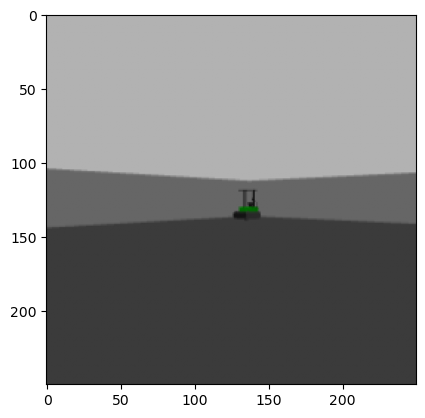

In [3]:
img = loser[0] / 255
plt.imshow(img)

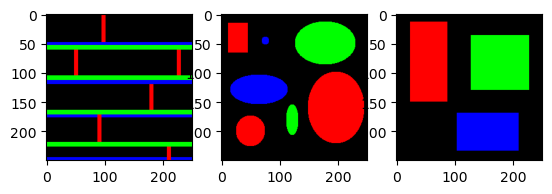

In [4]:
for i,pattern in enumerate(patterns):
    plt.subplot(1, len(patterns), i + 1)
    plt.imshow(pattern)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


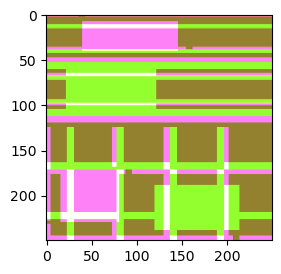

In [5]:




def repeat_pattern(pattern, tiles,rotate=True):
    result = np.zeros((pattern.shape[0] * tiles[0], pattern.shape[1] * tiles[1], 3))
    for i in range(tiles[0]):
        for j in range(tiles[1]):
            if rotate:  
                for k in range(np.random.randint(0, 4)):
                    pattern = np.rot90(pattern)

            result[i * pattern.shape[0]:(i + 1) * pattern.shape[0], j * pattern.shape[1]:(j + 1) * pattern.shape[1], :] = pattern
    
    return cv2.resize(result, (250, 250))

def random_colors(pattern):
    return pattern * np.random.uniform(3) * 0.5 + np.random.rand(3) * 0.5

def blur_color(pattern):
    weights = np.random.uniform(0, 10, size=(3,3))
    weights = weights / np.sum(weights)
    return cv2.filter2D(pattern, -1, weights)



def combine_patterns(s,p):
    
    filter = p != 0 
    result = np.where(filter, p, s)

    return result

def perlin_noise(x,y,c):

    noise = np.zeros((x,y,c))
    for i in range(x):
        for j in range(y):
            noise[i,j] = np.random.uniform(0, 1,(c,))


    noise = cv2.resize(noise, (int(y * 10),int(x * 10)))
    noise = cv2.blur(noise, (13, 13))
    noise = cv2.dilate(noise, np.ones((5,5)))
    return noise

def voronoi(point_c):
    points = np.random.randint(0, 250, size=(point_c, 2))
    img = np.zeros((250, 250, 1))
    for i in range(250):
        for j in range(250):
            distances = []
            for point in points:
                distances.append(np.linalg.norm(np.array([i,j]) - point))
            img[i,j] = np.min(distances)
    return img

def add_noise(pattern, noise):
    return np.where(noise > 0.5, pattern, np.random.uniform(0, 1, size=pattern.shape))

def rand_i(min,max):
    return np.random.randint(min, max)

def color_swaping(pattern):
    pattern = pattern.copy()
    idx = list(range(3))

    np.random.shuffle(idx)

    for i in range(3):
        pattern[:,:,i] = pattern[:,:,idx[i]]
    
    return pattern

def crop(pattern):
    x = rand_i(0, 250)
    y = rand_i(0, 250)
    pattern = pattern[x:x+250, y:y+250]

    return cv2.resize(pattern, (250, 250))


op1 = lambda x: add_noise(x, perlin_noise(25,25,3))
op2 = lambda x: repeat_pattern(x,(rand_i(1,5),rand_i(1,5)))
operations = []#[ op1, op2, crop]

def create_fn(pattern):

    return lambda x: combine_patterns(x, pattern / 255)

operations = [create_fn(p) for p in patterns] + [crop, op1, op2]

        

        #operations.append({'name':i,'op':op})
#plt.show()

def create_pattern():
    _pattern = np.ones((250, 250, 3)) * np.random.uniform(0, 1, size=(3,))
    #print(pattern.shape)
    #print(pattern.max())
    #pattern = combine_patterns([pattern, patterns[rand_i(0,len(patterns))]/ 255])
    for i in range(5):
        _op = operations[rand_i(0,len(operations))]
        _pattern = _op(_pattern)
        #print(_pattern.max())

    _pattern = color_swaping(_pattern)
    _pattern = random_colors(_pattern)
    #pattern = blur_color(pattern)

    return _pattern




new_result = create_pattern()
new = blur_color(pattern.copy())

plt.subplot(1, 2, 1)
plt.imshow(new_result, cmap='gray', vmin=0, vmax=1)
#print(pattern.shape)
#n = voronoi(15) / 255
#r = n.copy()
#n = (1 - n) * pattern

#print(n.shape)
#pattern = cv2.blur(pattern, (5, 5))
#plt.subplot(1, 2, 1)
#plt.imshow(new_result, cmap='gray', vmin=0, vmax=1)
#plt.subplot(1, 2, 2)
#plt.imshow(new, cmap='gray', vmin=0, vmax=1)


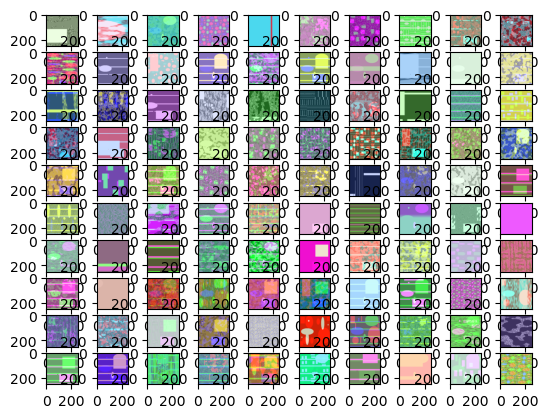

In [6]:
size = (10,10)
for i in range(size[0]):
    for j in range(size[1]):
        pattern = create_pattern()
        #print(pattern.shape)
        #print(pattern.dtype)
        plt.subplot(size[0], size[1], i * size[1] + j + 1)
        
        #pattern = cv2.resize(pattern, (64,64))
        max = np.max(pattern)
        max = 1 if max < 1 else max
        pattern = pattern / max
        plt.imshow(pattern,cmap='gray',vmin=0, vmax=1)

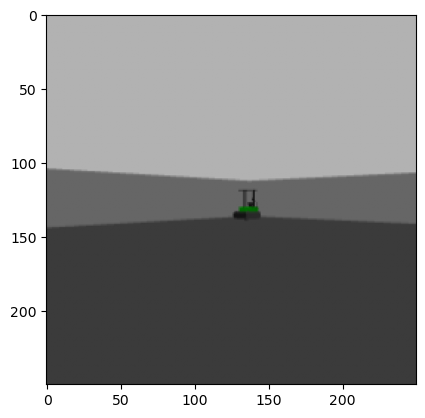

In [7]:
img = loser[0] / 255


plt.imshow(img)

In [8]:
def contrast(img, contrast):
    return (img - 0.5) * contrast + 0.5

def brightness(img, brightness):
    return img + brightness

def saturation(img, saturation):
    return img * saturation

def hue(img, hue):
    return img + hue

def normalize(img):
    return (img - np.min(img)) / (np.max(img) - np.min(img))

def randomize(img):
    img = contrast(img, np.random.uniform(0.75, 1.25))
    img = brightness(img, np.random.uniform(-0.5, 0.5))
    img = saturation(img, np.random.uniform(0.9, 1.1))
    #img = hue(img, np.random.uniform(-0.1, 0.1))
    
    return img / np.max(img)


[0.23137255 0.23137255 0.23137255] [0.4 0.4 0.4] [0.69803922 0.69803922 0.69803922]


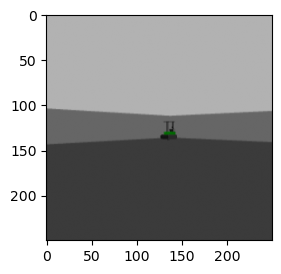

In [9]:
img = loser[0] / 255
plt.subplot(1, 2, 1)
plt.imshow(img)
ground = img[200,100]
wall = img[125,100]
sky = img[0,0]
print(ground, wall, sky) # [0.23137255 0.23137255 0.23137255] [0.4 0.4 0.4] [0.69803922 0.69803922 0.69803922]


In [10]:
img = cv2.resize(loser[0] / 255,(64,64))

features = [ground, wall,sky]

def apply_to_features(img, features):
    for i,feature in enumerate(features):
        test_pattern = create_pattern()
        test_pattern = cv2.resize(test_pattern, (64,64))
    
        img = np.where(img == feature, test_pattern,img)

    img = randomize(img)

    return img


0.09387275617256566 1.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


-0.2842917365072639 1.0
-0.30961653460766614 1.0
-0.17629696550728383 1.0


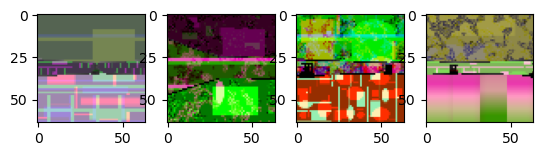

In [11]:
for i,img in enumerate(loser):
    img = img / 255
    img = cv2.resize(img, (64,64))
    img = apply_to_features(img, features)
    plt.subplot(1, len(loser), i+1)
    print(np.min(img), np.max(img))
    plt.imshow(img)
    img = cv2.cvtColor(np.uint8(img * 255), cv2.COLOR_RGB2BGR)
    cv2.imwrite(f'./{i}.png', img)

# 

(1757, 2)
(470, 2)
(1807, 2)
(2, 2)
(0, 2)
(0, 2)
(4096,) 5 0


<Figure size 1000x1000 with 0 Axes>

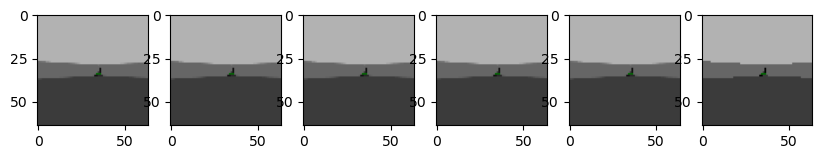

(1447, 2)
(1101, 2)
(1472, 2)
(0, 2)
(0, 2)
(0, 2)
(4096,) 2 0


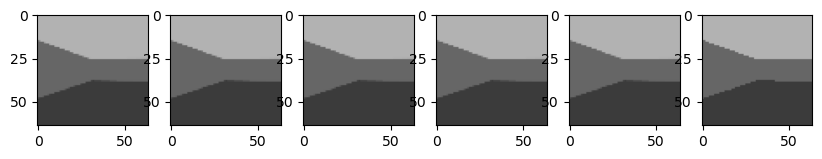

(1749, 2)
(442, 2)
(1804, 2)
(2, 2)
(3, 2)
(0, 2)
(4096,) 5 0


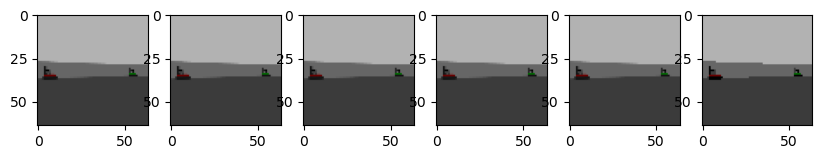

(1758, 2)
(458, 2)
(1812, 2)
(0, 2)
(2, 2)
(0, 2)
(4096,) 5 0


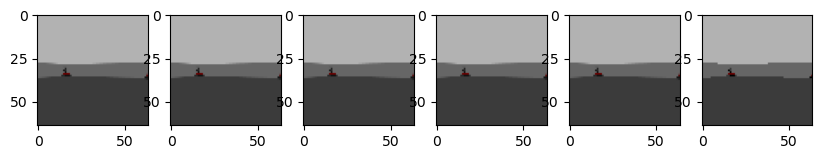

In [129]:
import segment as seg
import importlib as imp
imp.reload(seg)

ground = [59, 59, 59]
wall = [102, 102, 102]
sky = [178,178,178]

prey = [1,104,1]
predator = [104,0,0] 
robot = [0,0,0]


features = [ground, wall,sky]
all_features = [ground, wall,sky, prey, predator,robot]
features = (np.array(features)).astype(np.uint8)

def one_hot(img, features):
    img = img.reshape(-1,3)
    img = np.array(np.argmin([np.sum((img - feature)**2, axis=1) for feature in features], axis=0))
    print(img.shape, img.max(), img.min())
    img = np.eye(len(features))[img]

    img = img.reshape(64,64,-1)
    
    return img

def segment(img):

    #edges = seg.compute_edges(img)


    img = cv2.resize(img, (64,64), interpolation=cv2.INTER_NEAREST)
    #print(np.unique(img.reshape(-1,3), axis=0))
    img = img.astype(np.uint8)
    #img = img * (edges == 0).reshape(64,64,1)
    #img = img.astype(np.uint8)
    mask = np.zeros((img.shape[0] + 2, img.shape[1] + 2, 1)).astype(np.uint8)
    result = np.ones((img.shape[0], img.shape[1], 5)).astype(np.uint8) * [0,0,0,0,1]


    for i,feature in enumerate(all_features):
        #feature_img = np.ones((img.shape[0], img.shape[1], 3)) * feature
        #rangeImg = np.array(cv2.inRange(img, feature - [1,1,1], feature + [1,1,1]) )
        #rangeImg = np.where(img == feature, 1,0)
        #print(rangeImg.shape)
        #rangeImg = rangeImg.reshape(64,64,3) * feature
        args = np.argwhere((img == feature).all(axis=2))
        
        print(args.shape)
        for arg in args:
            rgb = (int(feature[0]), int(feature[1]), int(feature[2]))
            #_,img,mask,_ = cv2.floodFill(img, mask, (arg[1], arg[0]), rgb,(5,5,5),(5,5,5))

        plt.subplot(1, 6, i + 1)
        plt.imshow(img, cmap='gray', vmin=0, vmax=1)

    
    #img = img * (mask == 1)[1:-1,1:-1,:]
    img = one_hot(img, all_features)
    #img = cv2.dilate(img, np.ones((3,3), np.uint8), iterations=1)
    return img

plt.figure(figsize=(10,10))


for i,img in enumerate(loser):
    plt.figure(figsize=(10,10))
    
    img = segment(img)
    #print(img[50,40])
    plt.subplot(1, 6, 6)
    img = img @ np.array(all_features)
    img = img.astype(np.uint8)
    #print(img)
    plt.imshow(img.astype(np.uint8))
    plt.show()
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    cv2.imwrite(f'./{i}.png', img)


